In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Step 1: Load dataset
file_path = "LC_3.xlsx"
df = pd.read_excel(file_path)

print("Initial dataset shape:", df.shape)

Initial dataset shape: (34, 10542)


In [3]:
# Step 2: Separate features and target (assuming last column is target)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [4]:
# Step 3: Optimized mRMR (using all features)

feature = 19
def optimized_mrmr(X, y, n_features=feature):
    # Calculate mutual information for all features
    relevance = mutual_info_classif(X, y, discrete_features='auto')
    relevance_dict = dict(zip(X.columns, relevance))

    # Compute full correlation matrix once (saves time)
    corr_matrix = X.corr().abs()

    selected_features = []
    remaining_features = list(X.columns)

    # Select first feature (highest relevance)
    first_feature = max(relevance_dict, key=relevance_dict.get)
    selected_features.append(first_feature)
    remaining_features.remove(first_feature)

    print(f"Feature 1 selected: {first_feature}")

    # Iteratively select remaining features
    while len(selected_features) < n_features:
        best_score = -np.inf
        best_feature = None

        for feature in remaining_features:
            rel = relevance_dict[feature]
            # Redundancy: average correlation with selected features (fast lookup)
            redundancy = corr_matrix.loc[feature, selected_features].mean()
            score = rel - redundancy

            if score > best_score:
                best_score = score
                best_feature = feature

        selected_features.append(best_feature)
        remaining_features.remove(best_feature)
        print(f"Feature {len(selected_features)} selected: {best_feature}")

    return selected_features

selected_features = optimized_mrmr(X, y, n_features=feature)
print("\nTop 20 Selected Features (mRMR):")
print(selected_features)

Feature 1 selected: 31855_at
Feature 2 selected: 33430_at
Feature 3 selected: 1343_s_at
Feature 4 selected: 37908_at
Feature 5 selected: 39544_at
Feature 6 selected: 38267_at
Feature 7 selected: 38786_at
Feature 8 selected: 38379_at
Feature 9 selected: 912_s_at
Feature 10 selected: 33569_at
Feature 11 selected: 40323_at
Feature 12 selected: 39085_at
Feature 13 selected: 37251_s_at
Feature 14 selected: 39347_at
Feature 15 selected: 34771_at
Feature 16 selected: 36021_at
Feature 17 selected: 31902_at
Feature 18 selected: 37302_at
Feature 19 selected: 2027_at

Top 20 Selected Features (mRMR):
['31855_at', '33430_at', '1343_s_at', '37908_at', '39544_at', '38267_at', '38786_at', '38379_at', '912_s_at', '33569_at', '40323_at', '39085_at', '37251_s_at', '39347_at', '34771_at', '36021_at', '31902_at', '37302_at', '2027_at']


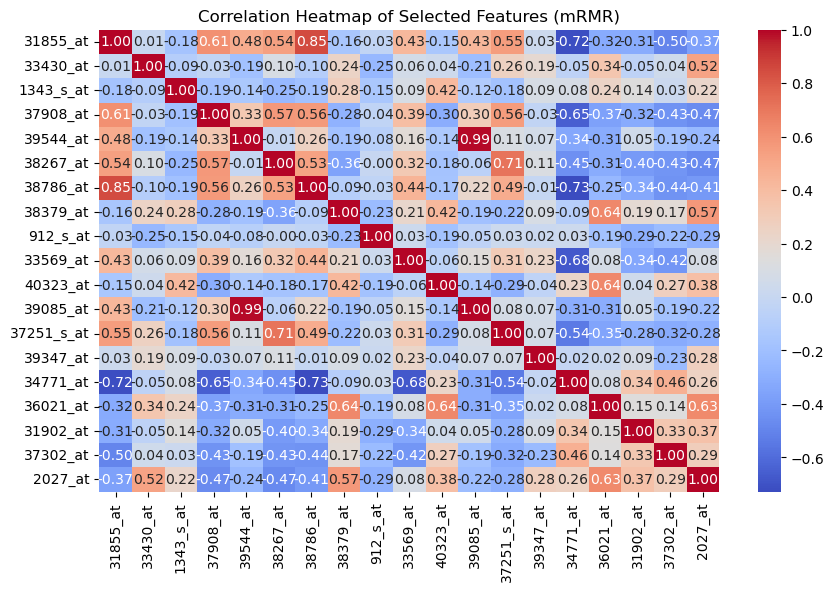

In [5]:
# Visualization 1: Correlation heatmap of selected features
plt.figure(figsize=(10, 6))
sns.heatmap(X[selected_features].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap of Selected Features (mRMR)")
plt.show()

In [6]:
# Step 4: Scaling (-1, 1)
scaler = MinMaxScaler(feature_range=(-1, 1))
X_scaled = pd.DataFrame(scaler.fit_transform(X[selected_features]), columns=selected_features)

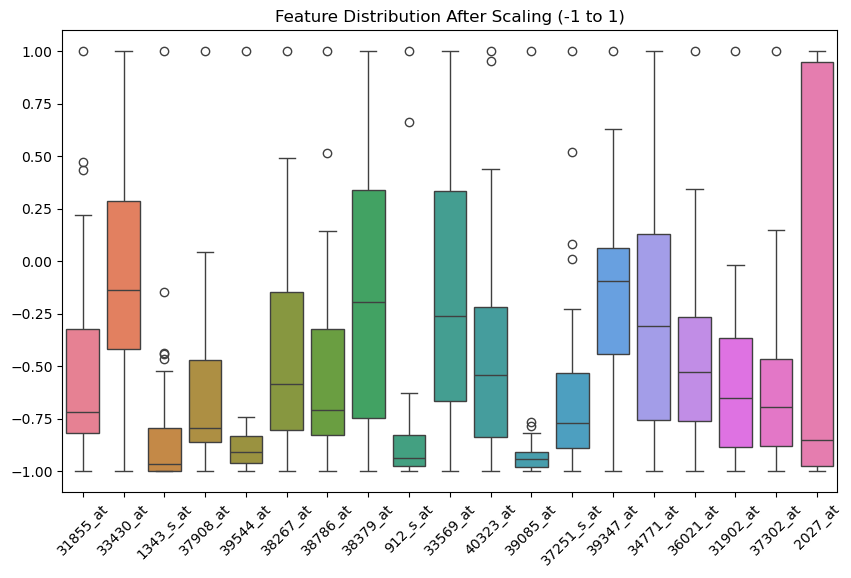

In [7]:
# Visualization 2: Distribution after scaling
plt.figure(figsize=(10, 6))
sns.boxplot(data=X_scaled)
plt.title("Feature Distribution After Scaling (-1 to 1)")
plt.xticks(rotation=45)
plt.show()

In [8]:
# Step 5: Randomize
np.random.seed(42)
shuffled_indices = np.random.permutation(len(X_scaled))
X_randomized = X_scaled.iloc[shuffled_indices].reset_index(drop=True)
y_randomized = y.iloc[shuffled_indices].reset_index(drop=True)

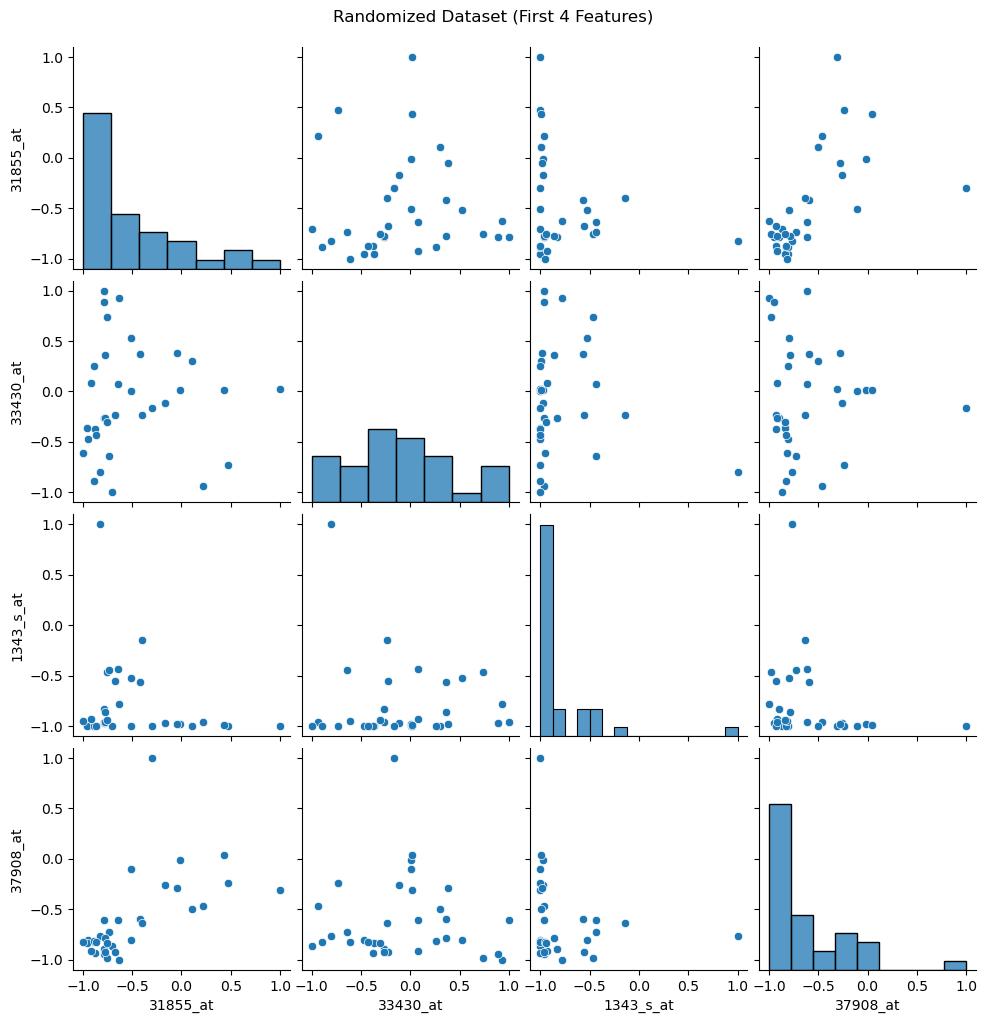

In [9]:
# Visualization 3: Pairplot (first 4 features)
sns.pairplot(X_randomized.iloc[:, :4])
plt.suptitle("Randomized Dataset (First 4 Features)", y=1.02)
plt.show()

In [10]:
print("\nFinal dataset shape after mRMR, scaling, and randomization:", X_randomized.shape)


Final dataset shape after mRMR, scaling, and randomization: (34, 19)


In [11]:
# Combine the processed (randomized) features and target back together
final_dataset = pd.concat([X_randomized, y_randomized.rename("Target")], axis=1)

# Display the final dataset
print("\n✅ Final Processed Dataset (After mRMR, Scaling, and Randomization):")
display(final_dataset.head(20))  # show first 20 rows

print("\nFinal dataset shape:", final_dataset.shape)


✅ Final Processed Dataset (After mRMR, Scaling, and Randomization):


,31855_at,33430_at,1343_s_at,37908_at,39544_at,38267_at,38786_at,38379_at,912_s_at,33569_at,40323_at,39085_at,37251_s_at,39347_at,34771_at,36021_at,31902_at,37302_at,2027_at,Target
0,-0.630349,0.930750,-0.781370,-1.000000,-1.000000,-0.647978,-0.857639,0.044763,-0.971804,-0.697316,-0.500556,-0.981829,-0.712090,0.054296,0.221702,-0.346967,-0.073175,-0.488960,1.000000,0
1,0.218560,-0.935336,-0.959042,-0.463378,-0.880151,-0.314305,1.000000,0.496909,-0.977315,0.418999,-0.294013,-0.973306,-0.761582,-0.231151,-1.000000,-0.312429,-0.671329,-0.763147,-0.990824,0
2,-0.510903,0.009402,-1.000000,-0.104618,-0.790969,0.459055,-0.249566,-0.334717,-0.891483,-0.079383,-0.983975,-0.764947,-0.544407,-0.273456,-0.914216,-0.758464,-0.916453,-0.961261,-0.999487,2
3,-0.171995,-0.113047,-0.975002,-0.255578,-0.822452,0.187903,-0.116247,-1.000000,-0.828317,0.171902,-1.000000,-0.786968,0.009492,0.001789,-0.734326,-0.841627,-0.947093,-0.993577,-0.976661,2
4,-0.951631,-0.469388,-1.000000,-0.803058,-0.948448,-0.934760,-1.000000,-0.886367,-0.965150,-1.000000,-0.822390,-0.941959,-1.000000,-0.831157,0.623815,-0.871620,-0.821867,-0.420514,-0.945172,1
5,0.111002,0.297409,-0.996662,-0.502734,-0.854688,0.493034,-0.005136,-0.782850,-0.630361,0.091186,-0.672824,-0.893123,0.519322,-0.173838,-0.862762,-0.755510,-0.968408,-0.921919,-1.000000,2
6,-0.884489,-0.890392,-1.000000,-0.829082,-0.971903,-0.788651,-0.771846,-0.776037,-0.991122,-0.609747,-0.963054,-0.990574,-0.937627,-0.853163,-0.197615,-0.509202,-0.339043,-0.429145,-0.847689,1
7,-0.784883,0.889934,-0.965801,-0.946034,-0.893948,-0.919810,-0.696253,0.167204,-1.000000,-0.834761,-0.168039,-0.994224,-0.884746,0.076249,0.061417,0.061122,-0.583214,-0.505018,1.000000,0
8,-0.294802,-0.163495,-1.000000,1.000000,-0.751646,-0.058784,-0.360388,-0.587054,-0.715992,-0.102608,-1.000000,-0.816911,0.081808,-0.152418,-0.930621,-0.785276,-0.557332,-0.942995,-0.994930,2
9,-0.958354,-0.363449,-1.000000,-0.835389,-0.894450,-0.780496,-0.935619,-0.884647,-0.955511,-0.724348,-0.799243,-0.992018,-0.961356,-1.000000,0.184812,-0.846853,-0.853840,0.148936,-0.858814,1



Final dataset shape: (34, 20)


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [13]:
# 1) Train–test split
X_train, X_test, y_train, y_test = train_test_split(
    X_randomized,
    y_randomized,
    test_size=0.2,      # 20% for testing
    random_state=42,    # for reproducibility
    stratify=y_randomized  # optional, good for classification
)

# 2) Train Random Forest
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)
rf_model.fit(X_train, y_train)

# 3) Predict and get accuracy
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Total samples: {len(X)}")
print(f"Training samples: {len(X_train)} ({len(X_train)/len(X)*100:.2f}%)")
print(f"Testing samples: {len(X_test)} ({len(X_test)/len(X)*100:.2f}%)")

print(f"Random Forest Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Total samples: 34
Training samples: 27 (79.41%)
Testing samples: 7 (20.59%)
Random Forest Accuracy: 100.00%

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         2

    accuracy                           1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7

